In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

In [6]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [7]:
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns').values)
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [8]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    num_of_features = X.shape[1]
    w = np.ones(shape=(num_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]

        y_pred = np.dot(w, sample_X.T) + b
        w_grad = -(2 / total_samples) * sample_X.T.dot(sample_y - y_pred)
        b_grad = -(2 / total_samples) * np.sum(sample_y - y_pred)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(sample_y - y_pred))

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0]), 10000)
w, b, cost

(array([0.70436264, 0.67638043]), -0.22912814230373116, 0.01076043097227851)

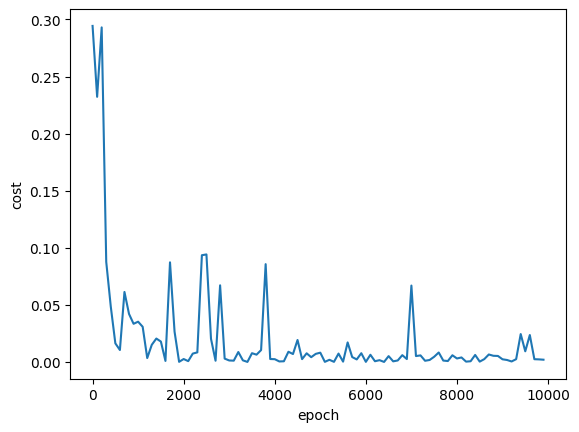

In [9]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [10]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

128.57195097374478